In [1]:
#import os
#os.chdir(r'C:\Users\Admin\Documents\Programming for Data Science\Coursework')
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(23)
def Metropolis_Hasting(x):
    return 0.5*np.exp(-abs(x))

In [3]:
def random_walk_metropolis(x,N,s):
    sample_space = np.zeros(N)
    sample_space[0] = x
    for i in range(1,N):
        x_star = np.random.normal(loc = sample_space[i - 1], scale = s)
        r = Metropolis_Hasting(x_star)/ Metropolis_Hasting(sample_space[i-1])
        rand_u = np.random.uniform(0,1)
        if np.log(rand_u) < np.log(r):
            sample_space[i] = x_star
        else:
            sample_space[i] = sample_space[i-1]

    return sample_space

In [4]:
samples1=random_walk_metropolis(5,5000,3)
print(samples1[:10])

[ 5.          5.          5.07743924  5.07743924  1.92419455 -2.04224802
 -2.04224802 -2.04224802 -0.03182753 -0.03182753]


In [5]:
new_samples= random_walk_metropolis(2, 10000, 1)
print(new_samples[:10])

[ 2.          0.51531645  0.51531645 -1.0188296  -1.0188296  -1.84851716
 -1.84851716 -1.01743846 -0.120321   -0.83131013]


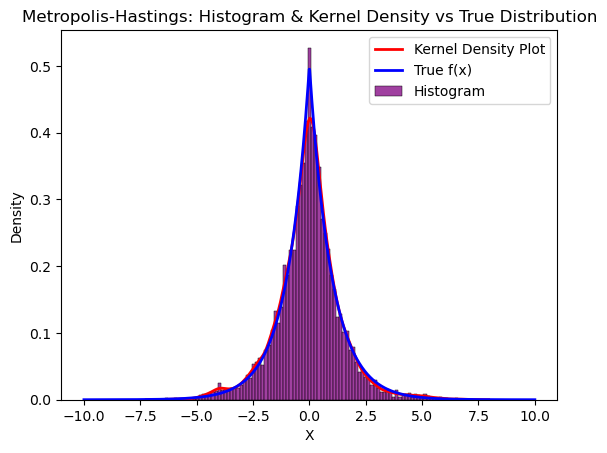

In [6]:
# set x and y values for the graph
x_vals=np.linspace(-10, 10, 1000)
fx=Metropolis_Hasting(x_vals)
sns.histplot(new_samples, bins=100, stat='density',color='purple',label='Histogram')
sns.kdeplot(new_samples,color='red', label='Kernel Density Plot', linewidth=2)
plt.plot(x_vals,fx, color='blue', label='True f(x)', linewidth=2)

plt.xlabel('X')
plt.ylabel('Density')
plt.title('Metropolis-Hastings: Histogram & Kernel Density vs True Distribution')
plt.legend()
plt.savefig('Metropolis-Hastings Sampling.png')
plt.show()

In [7]:
print('Monte Carlo Mean Estimate: ', np.mean(new_samples))
print('Monte Carlo Standard Deviation Estimate: ', np.std(new_samples))

Monte Carlo Mean Estimate:  -0.03610845405201969
Monte Carlo Standard Deviation Estimate:  1.4298722525609324


In [8]:
def MarkovChains(N,J):
    s_vals= np.linspace(0.001,1,2000)
    j_vals= np.random.uniform(-50,50,J)
    rhat_vals= np.zeros(len(s_vals))
    latest_rhat= 0
    for s in range(len(s_vals)):
        chains_matrix = np.empty((N,J))
        for j in range(len(j_vals)):
            chains_matrix[:,j] = random_walk_metropolis(j_vals[j],N, s_vals[s])
        M_j = np.mean(chains_matrix,axis=0)
        V_j = np.var(chains_matrix,axis=0,ddof=1)
        W=np.mean(V_j)
        M=np.mean(M_j)
        B=sum((M_j-M)**2)/J
        R_hat=np.sqrt((B+W)/W)
        rhat_vals[s] = R_hat
        latest_rhat= R_hat
    return{"S values":s_vals, "Rhat Values":rhat_vals,"Final Rhat Value": latest_rhat}

In [9]:
results= pd.DataFrame(MarkovChains(2000,4))
print(results)

      S values  Rhat Values  Final Rhat Value
0     0.001000  2139.389530          1.030751
1     0.001500  1586.407738          1.030751
2     0.001999   821.086220          1.030751
3     0.002499  1286.517164          1.030751
4     0.002999   706.452684          1.030751
...        ...          ...               ...
1995  0.998001     1.021288          1.030751
1996  0.998501     1.031169          1.030751
1997  0.999001     1.023191          1.030751
1998  0.999500     1.026237          1.030751
1999  1.000000     1.030751          1.030751

[2000 rows x 3 columns]


In [10]:
print(results.iloc[0])

S values               0.001000
Rhat Values         2139.389530
Final Rhat Value       1.030751
Name: 0, dtype: float64


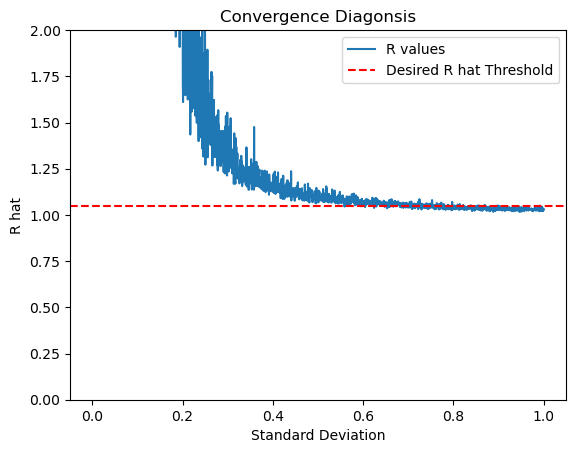

In [11]:
sns.lineplot(x=results["S values"],y=results["Rhat Values"],label="R values")
plt.axhline(y=1.05, color="red", linestyle="--",label="Desired R hat Threshold")
plt.ylim(0,2)
plt.xlabel("Standard Deviation")
plt.ylabel("R hat")
plt.title("Convergence Diagonsis")
plt.legend()
plt.savefig("Convergence Diagnosis.png")
plt.show()